In [1]:
# Import of packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Use of 2015 Rugby World Cup Data

In [2]:
# got unicode error so used 'latin-1' to read file

df = pd.read_csv("http://teaching.statistics-is-awesome.org/wp-content/uploads/2015/11/rubgy_world_cup_20151.csv", encoding='latin-1')

In [3]:
# drop null values to clean data
df.dropna(inplace = True)  

In [4]:
df

,team,name,caps,position,years_since_debut,debut,age,approx_age_debuted,height_cm,weight_kg
0,Australia,Stephen Moore,102.0,Hooker,10.5,11-Jun-05,32,22,186,112
1,Japan,Male Sau,26.0,Centre,2.6,20-Apr-13,28,25,183,97
2,South Africa,Pieter-Steph Du Toit,8.0,Lock,2.0,9-Nov-13,23,21,200,115
3,Japan,Harumichi Tatekawa,43.0,Centre,3.6,28-Apr-12,25,21,181,94
4,New Zealand,Beauden Barrett,36.0,Fly Half,3.4,23-Jun-12,24,21,187,91
5,Argentina,Martín Landajo,52.0,Scrum Half,5.5,21-May-10,27,22,171,81
6,New Zealand,Ben Smith,48.0,Wing,6.0,14-Nov-09,29,23,186,94
7,Scotland,David Denton,32.0,Back Row,4.3,6-Aug-11,25,21,196,114
8,Samoa,Wayne Ole Avei,24.0,Hooker,4.4,2-Jul-11,32,28,178,114
9,Japan,Hitoshi Ono,96.0,Lock,11.5,16-May-04,37,26,192,106


In [5]:
df.shape

(643, 10)

In [6]:
df.isnull().sum()

team                  0
name                  0
caps                  0
position              0
years_since_debut     0
debut                 0
age                   0
approx_age_debuted    0
height_cm             0
weight_kg             0
dtype: int64

In [7]:
df.dtypes

team                   object
name                   object
caps                  float64
position               object
years_since_debut     float64
debut                  object
age                     int64
approx_age_debuted      int64
height_cm               int64
weight_kg               int64
dtype: object

In [8]:
df.describe()

,caps,years_since_debut,age,approx_age_debuted,height_cm,weight_kg
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,32.416796,5.051477,27.732504,22.864697,186.124417,102.937792
std,25.046322,3.618154,3.741239,2.759641,7.223409,12.840594
min,1.000000,0.100000,19.000000,18.000000,165.000000,65.000000
25%,14.000000,2.000000,25.000000,21.000000,181.000000,93.000000
50%,26.000000,4.300000,28.000000,22.000000,186.000000,103.000000
75%,43.000000,7.400000,30.000000,24.000000,191.000000,113.000000
max,148.000000,17.000000,38.000000,34.000000,208.000000,145.000000


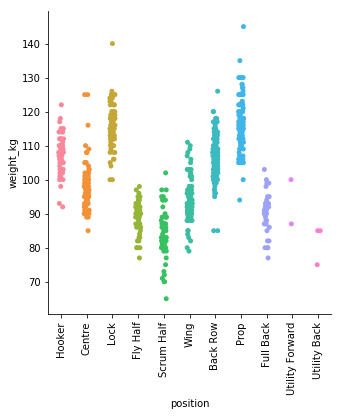

In [9]:
# comparison of weights to position

chart = sns.catplot(x="position", y="weight_kg",data=df)
chart.set_xticklabels(rotation=90)
plt.show('chart')

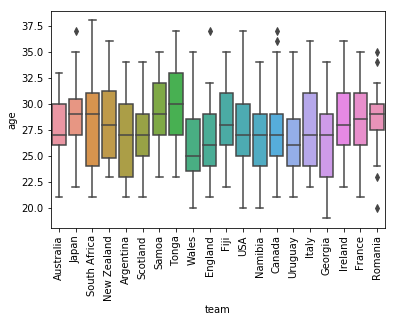

In [13]:
plot = sns.boxplot(x="team", y="age", data=df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()